# Finger Excercise #4 

In [1]:
# Finger4.1.ipynb
# version con rolling hash
# Ignacio Giss

import matplotlib.pyplot as plot
import matplotlib.cm as cm
import matplotlib.colors
import numpy


%matplotlib inline


In [2]:
def graph(datar, alphav, bufferSize):
    xData = [x[0] for x in datar]    
    yData = [y[1] for y in datar]  
    rcol = numpy.arange(len(yData))
    rcol /= bufferSize
   
    plot.scatter(xData, yData, edgecolors='none', c=rcol, alpha = alphav, s=65)    
    
def graphSet(ax):       
    plot.xlabel('distancia')
    plot.ylabel('longitud')
    plot.colorbar()
    plot.axis('auto')
    ax.set_xlim(xmin=0)
    ax.set_ylim(ymin=0)
    
    plot.show()

In [3]:
consBase = 257
consMax = 1000000007

def rhash0(iniStr):
    rhashIni = 0
    for i in range(len(iniStr)):
        rhashIni = rhashIni*consBase + ord(iniStr[i])
        rhashIni %= consMax
    return rhashIni


def hashing_rk(lengr, haystack, alphav, repetitions, dicrh):    
    rhash = 0
    
    actPow = 1
    for i in range(lengr):        
        actPow = (actPow * consBase) % consMax        

    for pos in range(len(haystack)):
        rhash = rhash*consBase + ord(haystack[pos])
        rhash %= consMax
        
        if (pos >= lengr):
            rhash -= actPow * ord(haystack[pos - lengr]) % consMax
            if (rhash < 0):
                rhash += consMax       
        
        if dicrh.has_key(rhash) and (pos >= lengr-1):            
            repetitions.append((abs(pos - dicrh[rhash][0][0]), lengr))
        else:
            dicrh[rhash] = [(pos, lengr)] 
        
    
    return -1;

def graphRepetitions(fileIn, bufferSize=25, alphav=0.1):
    plot.figure(figsize=(25,6))
    ax = plot.subplot(111)
    
    text=fileIn.read().replace('\n', '')    
    
    for lengr in range(2, bufferSize):
        repetitions = []
        dicrh = {}
        hashing_rk(lengr, text, alphav, repetitions, dicrh)
        graph(repetitions, alphav, bufferSize)
    
    graphSet(ax)
    return  

## Shakespeare

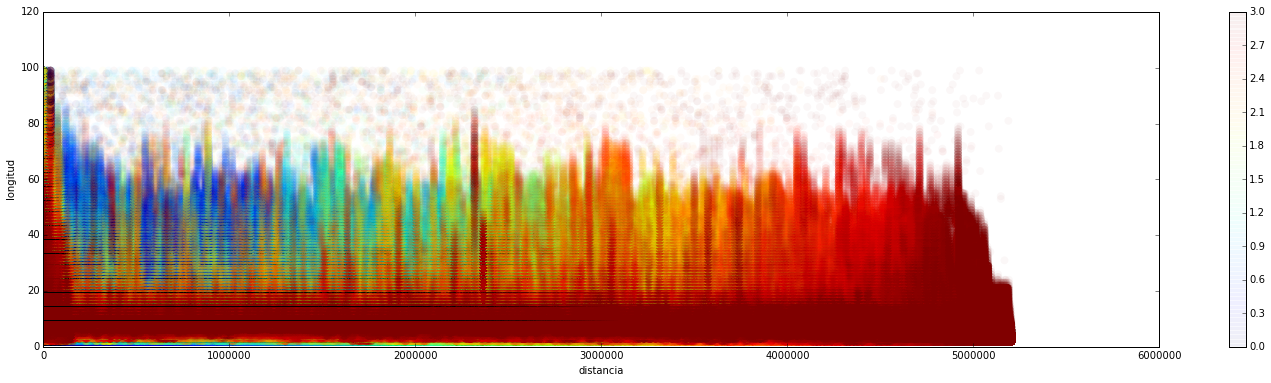

In [4]:
# 5.205.583 caracteres, 122.449 lineas
consMax = 100000000003
text1 = open("shakespeare.txt")
dataTxt1 = graphRepetitions(text1, 100, 0.03)


## David Bohm - La Totalidad y el Orden Implicado

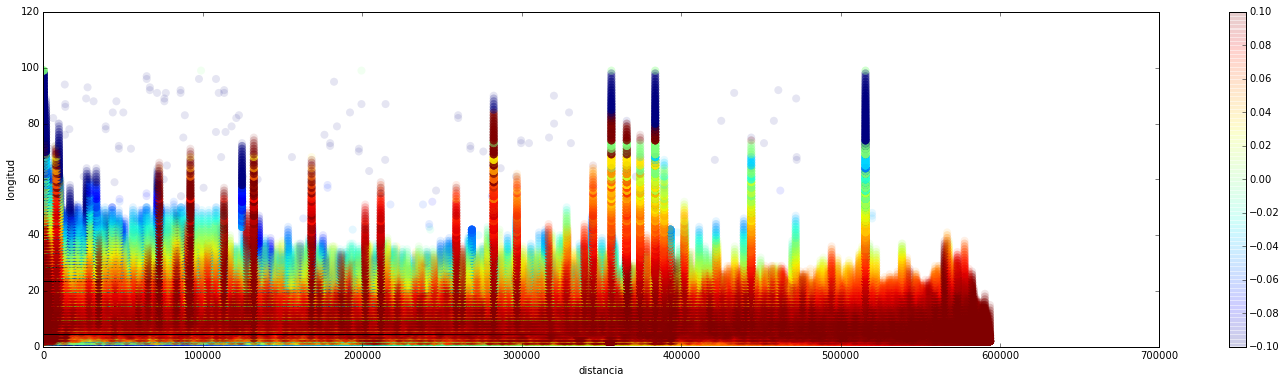

In [4]:
# 593.989 caracteres, 9.471 lineas
consMax = 100000000003
text2 = open("David Bohm - La Totalidad y el Orden Implicado.txt")
dataTxt2 = graphRepetitions(text2, 100, 0.1)


## Jorge Luis Borges - El Aleph

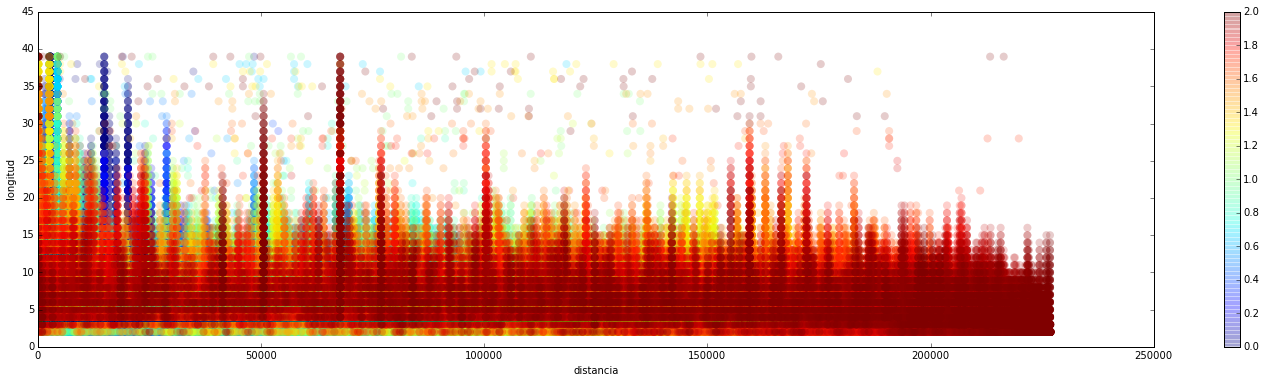

In [6]:
# 226.479 caracteres, 3.473 lineas
text3 = open("Jorge Luis Borges - El Aleph.txt")
dataTxt3 = graphRepetitions(text3, 40, 0.2)


## Código C++

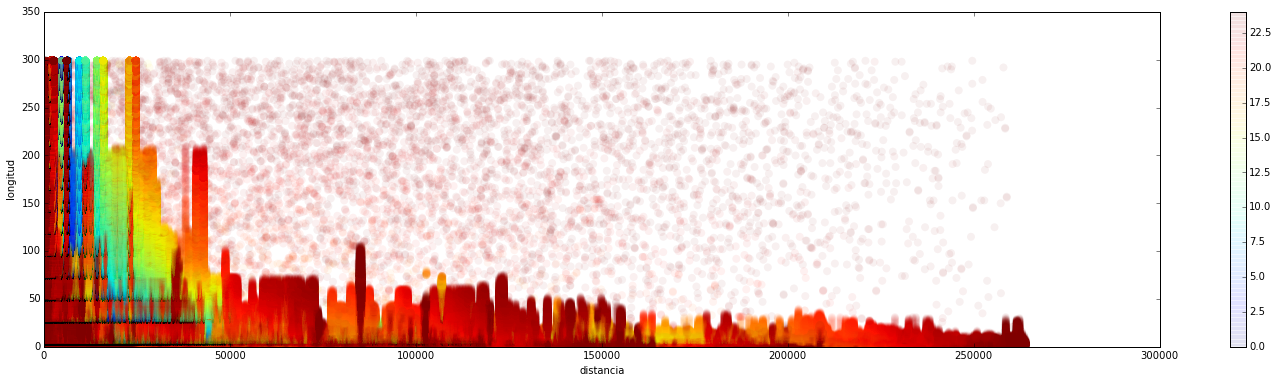

In [4]:
# 256.256 caracteres, 9.465 lineas
text4 = open("codigo.cpp")
dataTxt4 = graphRepetitions(text4, 300, 0.06)


## Metallica - all lyrics

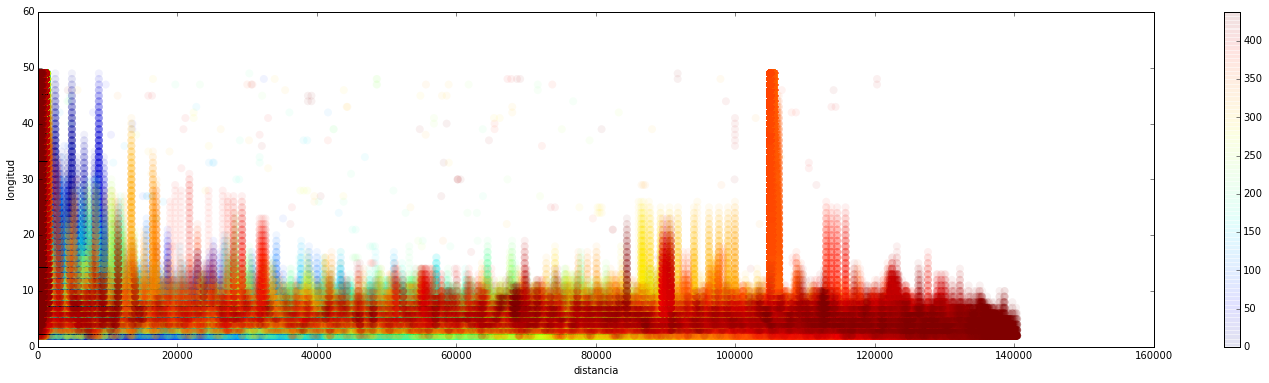

In [27]:
# 136.562 caracteres, 6.876 lineas
text5 = open("metallica.txt")
dataTxt5 = graphRepetitions(text5, 50, 0.06)


## Conclusiones

In [ ]:
# Conclusiones
#
#    Claramente hay distancias que son más probables que otras, sobre todo dependiendo del tipo  
#    de texto. Los textos literarios tienen solo unas pocas distancias que son más probables que otras
#    (por debajo de 100 posiciones), mientras que un arcivo de código tiene muchas más longitudes. 
#    Y las letras de canciones también tiene muchas repeticiones, es probable que sea por los 
#    estribillos y palabras que se usan con frecuencia en las letras. 
#    El último gráfico es de todas las letras de Metallica. El disco "Garage Inc."  tiene 
#    repetido "Am I Evil?" (cover de Diamond Head) que también está en "Kill 'Em All" y por eso hay 
#    un pico importante.
#    Pero habría que calcular
#    muchos más archivos para tener una idea más clara. 
#
#    Las longitudes por debajo de 20 caracteres tienen casi siempre muchas repeticiones. 
#    hay ciertas distancias que tienen longitudes caracteristicas que tienen varias repeticiones.
#    En archivos muy grandes se encuentran muchas más repeteciones de más caracteres, habiendo
#    una franja importante de hasta 60 caracteres repetido para el texto de shakespeare, que es casi
#    nueve veces el tamaño del archivo más grande que pude medir. Pero al mismo tiempo encontrar estas
#    repeticiones de hasta 60 caracteres en procesamiento resulta costoso, por lo que no sería
#    muy bueno de tener en cuenta para comprimir un archivo. 
#  
#    Se podría usar las repeticiones por debajo de los 20 caracteres para comprimir toda esa
#    parte de los archivos.
#
#    Los graficos tienen ruido por las colisiones en el hash y son proporcionales al tamaño del
#    buffer y del tamaño del archivo. Se ven mejoras aumentando el tamaño del hash (consMax)
#